In [28]:
#importing libraries

#For data analysis and wrangling
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Set up the Titanic csv file as a DataFrame
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [30]:
# Let's see a preview of the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# We could also get overall info for the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB



# Data Visualization

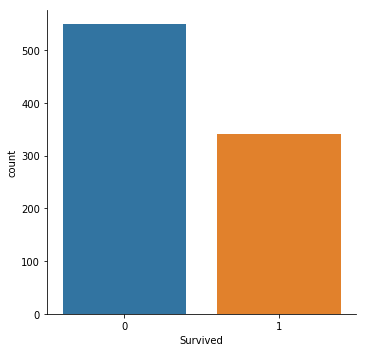

In [32]:
# Let's first check how many people survived
sns.catplot('Survived',data=train_df,kind='count')

Obviously we can see most people didn't survive Titanic

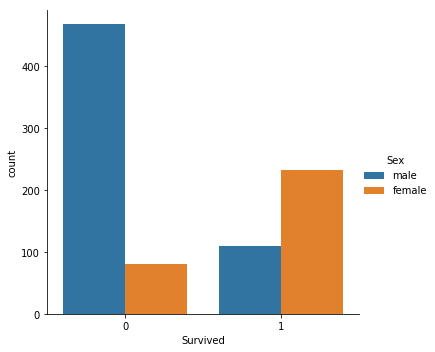

In [33]:
# Now classify the survived person on basis of Gender
sns.catplot('Survived',data=train_df,kind='count', hue='Sex')

Looks like Female count is almost twice as compared to the males

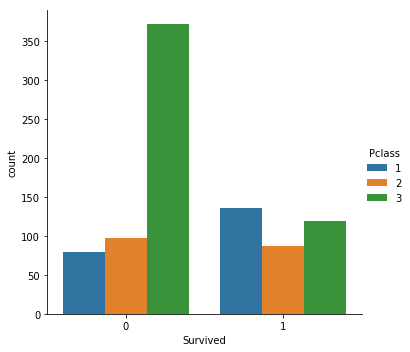

In [34]:
# Now classify the survived person on basis of socio-economic status
sns.catplot('Survived',data=train_df,kind='count', hue='Pclass')

Looks like most of the people who didn't survived Titanic were of Lower class

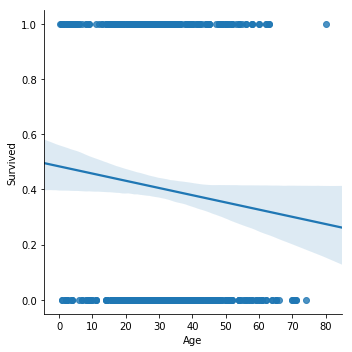

In [35]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=train_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived.

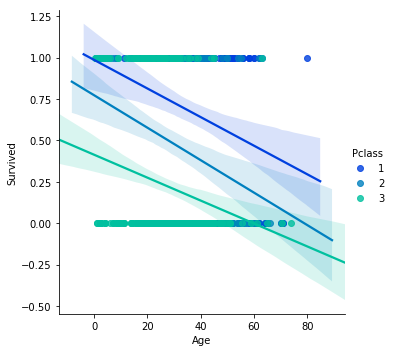

In [36]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=train_df,palette='winter')

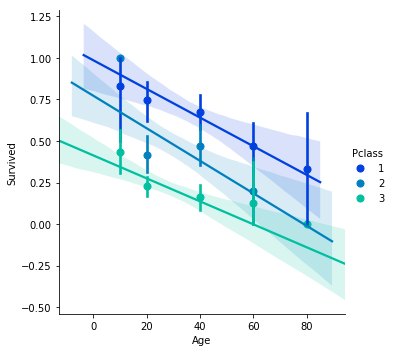

In [37]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=train_df,palette='winter',x_bins=generations)

# Feature Engineering

In [38]:
full_data = [train_df, test_df]

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

# Feature that tells whether a passenger had a cabin on the Titanic
train_df['Has_Cabin'] = train_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_df['Has_Cabin'] = test_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

#Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

#Remove all NULLS in the Age column
for dataset in full_data:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [39]:
# Feature selection
drop_elements = ['PassengerId', 'Name','SibSp','Parch','Ticket','Fare','Cabin']
train_df = train_df.drop(drop_elements, axis = 1)

#For safe keeping
PassengerID = test_df['PassengerId']
test_df = test_df.drop(drop_elements, axis = 1)

In [40]:
# Create new DataFrames for the Categorical Variable of Embarked column
embarked_dummies_train = pd.get_dummies(train_df['Embarked'])
embarked_dummies_test = pd.get_dummies(test_df['Embarked'])

# Let's take a quick look at the results
embarked_dummies_train.head()

,0,1,2
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [41]:
# Create column names for the new DataFrames
embarked_dummies_train.columns = ['emb1','emb2','emb3']
embarked_dummies_test.columns = ['emb1','emb2','emb3']
# Now Drop the original column and Concat DataFrame with the dummy variables
train_df = train_df.drop(['Embarked'],axis=1)
train_df = pd.concat([train_df,embarked_dummies_train],axis=1)

test_df = test_df.drop(['Embarked'],axis=1)
test_df = pd.concat([test_df,embarked_dummies_test],axis=1)

We will be dropping the emb1 column to avoid multicollinearity.

In [42]:
# Dropping one column of dummy variable set to avoid multicollinearity
train_df = train_df.drop('emb1',axis=1)
test_df = test_df.drop('emb1',axis=1)

# Model, predict and solve

for Supervised Learning plus Classification and Regression, our choice of models to are:

1. Logistic Regression
2. KNN or k-Nearest Neighbors
3. Support Vector Machines
4. Naive Bayes classifier
5. Decision Tree
6. Random Forrest

Splitting training dataset into the Training set and Test set to measure the performance of the models

In [43]:
X = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 1. Logistic Regression

It measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features)

Note the confidence score generated by the model based on the training dataset.

In [45]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_test, y_pred)*100
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


82.68156424581005

## 2. KNN or k-Nearest Neighbors

In pattern recognition k-NN is a non-parametric method used for classification and regression

In [46]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_test, y_pred)*100
acc_knn

82.68156424581005

## 3. Support Vector Machines

In [47]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
acc_svm = accuracy_score(y_test, y_pred)*100
acc_svm

78.77094972067039

## 4. Gaussian Naive Bayes classifier

In [48]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
acc_nb = accuracy_score(y_test, y_pred)*100
acc_nb

83.24022346368714

## 5. Decision Tree

In [49]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test, y_pred)*100
acc_dt

79.88826815642457

## 6. Random Forrest

In [50]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(y_test, y_pred)*100
acc_rf

80.44692737430168

## Model evaluation

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest','Decision Tree', 'Naive Bayes'],
    'Score': [acc_svm, acc_knn, acc_log, acc_rf,acc_dt, acc_nb,]})

models.sort_values(by='Score', ascending=False)

,Model,Score
5,Naive Bayes,83.240223
1,KNN,82.681564
2,Logistic Regression,82.681564
3,Random Forest,80.446927
4,Decision Tree,79.888268
0,Support Vector Machines,78.770950


Since Gaussian Naive Bayes has the best score so we will this Model for our final Prediction

### Final Prediction

In [57]:
Final_X_test = test_df.iloc[:,:].values

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(Final_X_test)

In [58]:
submission = pd.DataFrame({
        "PassengerId": PassengerID,
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)